# Higher Diploma in Science in Computing (Data Analytics)  

**University**: [Atlantic Technological University (ATU)](https://www.atu.ie/)  
**Module:** Computer Infrastructure  
**Lecturer:** [Ian McLoughlin](https://github.com/ianmcloughlin)  
**Author:** [Elaine R. Cazetta](https://github.com/elainecazetta)  

---

# Project: FAANG Stock Data Analysis with yfinance  
This notebook demonstrates how to download, store, and visualize [FAANG](https://www.investopedia.com/terms/f/faang-stocks.asp) stock data using Python and the yfinance package. It also shows how to structure a reusable function and automate plotting for further analysis.

---

## 🔹Problem 1 – Data from yfinance

---

### - Requirements:

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

---

### - Overview of the Solution:  

The following steps show how to import the necessary libraries, download hourly FAANG stock data for the past five days using the yfinance package, and save it to a timestamped CSV file inside the `data` folder.

In [ ]:
# Import libraries

# Data Frames
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt

# Files and folders
import os

# Filter files
import glob

In [2]:
# List of FAANG tickers
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

In [3]:
# Download FAANG stocks data and assign it to a dataframe:
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
df.head(3) # show the first 3 rows

/tmp/ipykernel_13124/1249406616.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-18 14:30:00+00:00  267.649994  225.520004  282.329987  586.817627   
2025-11-18 15:30:00+00:00  267.839996  226.259995  286.817993  592.770996   
2025-11-18 16:30:00+00:00  267.165009  222.814407  284.890015  588.564575   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-18 14:30:00+00:00  111.849998  270.704987  230.199997  288.910004   
2025-11-18 15:30:00+00:00  112.470001  268.119995  226.600006  286.817993   
2025-11-18 16:30:00+00:00  112.489998  268.338013  226.520004  287.950012   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-18 14:30:00+00:00  597.669983  112.980003  ...  269.915009   
2025-11-18 15:30:00+00:00  594.349976  112.610001  ...  267.665009   
2025-11-18 16:30:00+00:00  594.399902  113.339104  ...  267.839996   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-18 14:30:00+00:00  228.119995  288.399994  591.599976  110.290001   
2025-11-18 15:30:00+00:00  225.490005  282.358185  586.770020  111.839996   
2025-11-18 16:30:00+00:00  226.250000  286.769989  592.799988  112.470001   

Price                       Volume                                       
Ticker                        AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                 
2025-11-18 14:30:00+00:00  8219985  13352762  5737756  5324154  6586155  
2025-11-18 15:30:00+00:00  3521812   4801911  2999708  2462385  2823663  
2025-11-18 16:30:00+00:00  2742457   4671663  2383926  1678701  2699207  

[3 rows x 25 columns]

### - The `Data` Directory:  
This step uses Python’s built-in `os` module to create a folder named `data`. This directory will store the CSV files downloaded from Yahoo Finance. The `os.makedirs()` function is used with the `exist_ok=True` argument to ensure the folder is created if it doesn’t already exist, avoiding any errors if it’s run multiple times.

In [4]:
# Import the os module and create 'data' folder if it doesn't exist
# Reference: https://docs.python.org/3/library/os.html
# Reference: OpenAI
import os

os.makedirs("data", exist_ok=True)

In [5]:
# Save dataframe to CSV
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv('data/data.csv')

### - Dates and Times:   
To create unique filenames, a timestamp is generated using Python’s `datetime` module [(reference: official documentation)](https://docs.python.org/3/library/datetime.html). This guarantees that each dataset is saved with a distinctive and descriptive name.

In [6]:
# Get the current date and time using the datetime module
now = dt.datetime.now()

# Display the current date and time
now

datetime.datetime(2025, 11, 25, 4, 13, 57, 313368)

In [7]:
# Format the current date and time as a string: YYYYMMDD-HHmmss
# This format will be used in the filename
now.strftime("%Y%m%d-%H%M%S")

'20251125-041357'

In [8]:
# Create a unique filename that includes the timestamp
# The file will be saved inside the 'data' folder as a CSV file
filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
print(filename)

data/20251125-041357.csv


In [9]:
# Save the downloaded dataframe (df) to the CSV file
# This will store the FAANG stock data in the 'data' folder
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv(filename)

### - Complete Function: `get_data()`    

Below is the final version of the `get_data()` function that combines all the steps demonstrated earlier. This function downloads hourly stock data for the five FAANG companies for the previous five days, creates a timestamped filename using the `datetime` module, saves the dataset as a CSV file inside the `data` folder, and ensures that the folder exists before saving.

In [10]:
# Script of the `get_data()` function

def get_data():
# References: 
# https://www.w3schools.com/python/python_functions.asp
# https://docs.python.org/3/tutorial/controlflow.html#defining-functions
# OpenAI
    """
    Downloads hourly stock data for the previous five days 
    for the FAANG companies and saves it as a timestamped CSV file.
    """
    
    # Import libraries inside the function
    import yfinance as yf
    import datetime as dt
    import os
  
    # Download hourly data for the last 5 days of FAANG tickers
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

    # Create 'data' folder if it doesn't exist
    # Ref: https://docs.python.org/3/library/os.html
    # Ref: OpenAI
    os.makedirs("data", exist_ok=True)

    # Generate filename with timestamp
    filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"

    # Save data to CSV
    df.to_csv(filename)

    # Print confirmation message
    print(f"Data saved to {filename}")

    # Return the downloaded DataFrame
    return df

# Example usage
df = get_data()
df.head(3)

/tmp/ipykernel_13124/3478650145.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed

Data saved to data/20251125-041357.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-18 14:30:00+00:00  267.649994  225.520004  282.329987  586.817627   
2025-11-18 15:30:00+00:00  267.839996  226.259995  286.817993  592.770996   
2025-11-18 16:30:00+00:00  267.165009  222.814407  284.890015  588.564575   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-18 14:30:00+00:00  111.849998  270.704987  230.199997  288.910004   
2025-11-18 15:30:00+00:00  112.470001  268.119995  226.600006  286.817993   
2025-11-18 16:30:00+00:00  112.489998  268.338013  226.520004  287.950012   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-18 14:30:00+00:00  597.669983  112.980003  ...  269.915009   
2025-11-18 15:30:00+00:00  594.349976  112.610001  ...  267.665009   
2025-11-18 16:30:00+00:00  594.399902  113.339104  ...  267.839996   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-18 14:30:00+00:00  228.119995  288.399994  591.599976  110.290001   
2025-11-18 15:30:00+00:00  225.490005  282.358185  586.770020  111.839996   
2025-11-18 16:30:00+00:00  226.250000  286.769989  592.799988  112.470001   

Price                       Volume                                       
Ticker                        AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                 
2025-11-18 14:30:00+00:00  8219985  13352762  5737756  5324154  6586155  
2025-11-18 15:30:00+00:00  3521812   4801911  2999708  2462385  2823663  
2025-11-18 16:30:00+00:00  2742457   4671663  2383926  1678701  2699207  

[3 rows x 25 columns]

---

## 🔹Problem 2: Plotting Data  

---

### - Requirements:  

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

---

### - Visualizing FAANG Stock Prices  

In this section, we visualize the closing prices (`Close`) for the five FAANG companies using the most recent dataset saved in the `data` folder. The plots below demonstrate how to use pandas’ built-in plotting functions to easily visualize stock price trends. Each plot includes axis labels, a legend, and a date title for clarity.  

Finally, we combine these steps into a function called `plot_data()` that automatically opens the latest CSV file, plots all FAANG `Close` prices, and saves the chart as a timestamped `.png` file inside the `plots` folder.  

- Exploring and Preparing the Data:

The following commands show how to inspect and plot data directly from the DataFrame before building the complete plotting function.

<Axes: xlabel='Datetime'>

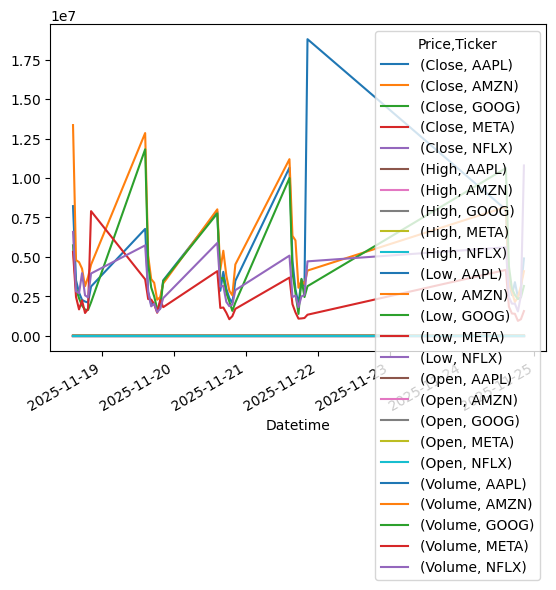

In [11]:
# Just call plot() with no arguments and see what happens
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df.plot()

In [12]:
# List of columns of the dataframe
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [13]:
# The closing price for Apple.
df[('Close', 'AAPL')]

Datetime
2025-11-18 14:30:00+00:00    267.649994
2025-11-18 15:30:00+00:00    267.839996
2025-11-18 16:30:00+00:00    267.165009
2025-11-18 17:30:00+00:00    268.450012
2025-11-18 18:30:00+00:00    268.034485
2025-11-18 19:30:00+00:00    268.280212
2025-11-18 20:30:00+00:00    267.510010
2025-11-19 14:30:00+00:00    271.850006
2025-11-19 15:30:00+00:00    269.730011
2025-11-19 16:30:00+00:00    270.399994
2025-11-19 17:30:00+00:00    270.029999
2025-11-19 18:30:00+00:00    269.670013
2025-11-19 19:30:00+00:00    270.035004
2025-11-19 20:30:00+00:00    268.570007
2025-11-20 14:30:00+00:00    273.904999
2025-11-20 15:30:00+00:00    271.779999
2025-11-20 16:30:00+00:00    268.940002
2025-11-20 17:30:00+00:00    268.809998
2025-11-20 18:30:00+00:00    267.795013
2025-11-20 19:30:00+00:00    267.320007
2025-11-20 20:30:00+00:00    266.380005
2025-11-21 14:30:00+00:00    269.850006
2025-11-21 15:30:00+00:00    270.899994
2025-11-21 16:30:00+00:00    270.549988
2025-11-21 17:30:00+00:00    27

<Axes: xlabel='Datetime'>

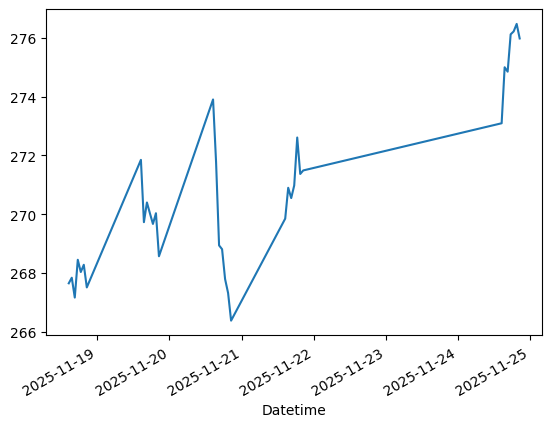

In [14]:
# Plotting the closing price for Apple
df[('Close', 'AAPL')].plot()

<Axes: xlabel='Datetime'>

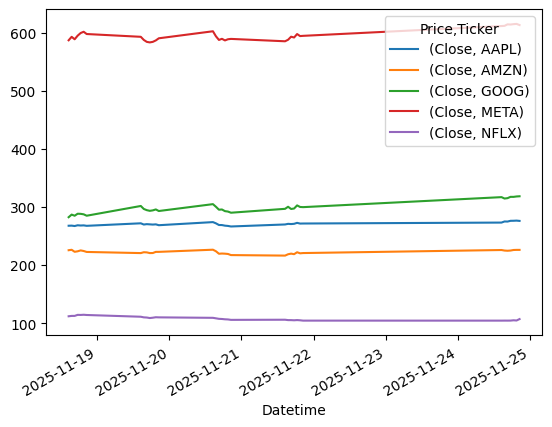

In [15]:
# The closing price for FAANG stocks
df[[('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOG'), ('Close', 'META'), ('Close', 'NFLX')]].plot()

In [16]:
# Simplify accessing the 'Close' prices without hard-coding the stock names
df['Close']
print(df['Close'].head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-11-18 14:30:00+00:00  267.649994  225.520004  282.329987  586.817627   
2025-11-18 15:30:00+00:00  267.839996  226.259995  286.817993  592.770996   
2025-11-18 16:30:00+00:00  267.165009  222.814407  284.890015  588.564575   

Ticker                           NFLX  
Datetime                               
2025-11-18 14:30:00+00:00  111.849998  
2025-11-18 15:30:00+00:00  112.470001  
2025-11-18 16:30:00+00:00  112.489998  


<Axes: xlabel='Datetime'>

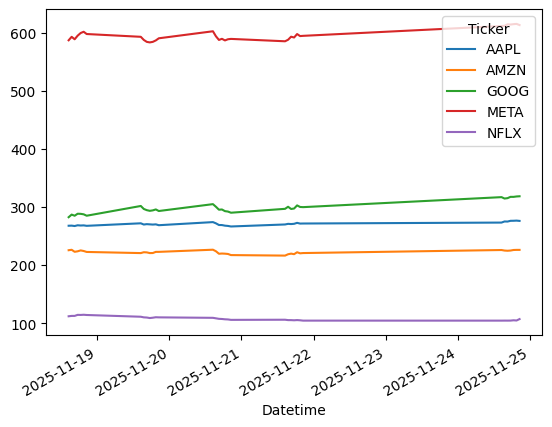

In [17]:
# Plotting the closing prices for all stocks
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df['Close'].plot()

### - Finding the Latest CSV File  

To work with the most recent dataset, we search the `data` folder for all CSV files using Python’s `glob` module. Each file’s creation time is checked with `os.path.getctime`, and the newest file is selected. If no CSV files exist, the function exits to avoid errors.

In [18]:
import glob
import os

# Find the most recent CSV file in the 'data' folder
# References: 
# https://docs.python.org/3/library/glob.html
# https://docs.python.org/3/library/os.html
# OpenAI

# The 'glob' module searches for all CSV files in the folder
list_of_files = glob.glob("data/*.csv")

# 'os.path.getctime' returns the creation time of the file; 'max' finds the latest one
latest_file = max(list_of_files, key=os.path.getctime)
print(f"Using latest file: {latest_file}")

Using latest file: data/20251125-041357.csv


Read the most recent CSV file into a DataFrame:

In [24]:
# header=[0, 1] handles multi-level columns; index_col=0 sets the first column as the index
df = pd.read_csv(latest_file, header=[0, 1], index_col=0)
df.head(3) # Display the first 3 rows

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-18 14:30:00+00:00  267.649994  225.520004  282.329987  586.817627   
2025-11-18 15:30:00+00:00  267.839996  226.259995  286.817993  592.770996   
2025-11-18 16:30:00+00:00  267.165009  222.814407  284.890015  588.564575   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-18 14:30:00+00:00  111.849998  270.704987  230.199997  288.910004   
2025-11-18 15:30:00+00:00  112.470001  268.119995  226.600006  286.817993   
2025-11-18 16:30:00+00:00  112.489998  268.338013  226.520004  287.950012   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-18 14:30:00+00:00  597.669983  112.980003  ...  269.915009   
2025-11-18 15:30:00+00:00  594.349976  112.610001  ...  267.665009   
2025-11-18 16:30:00+00:00  594.399902  113.339104  ...  267.839996   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-18 14:30:00+00:00  228.119995  288.399994  591.599976  110.290001   
2025-11-18 15:30:00+00:00  225.490005  282.358185  586.770020  111.839996   
2025-11-18 16:30:00+00:00  226.250000  286.769989  592.799988  112.470001   

Price                       Volume                                       
Ticker                        AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                 
2025-11-18 14:30:00+00:00  8219985  13352762  5737756  5324154  6586155  
2025-11-18 15:30:00+00:00  3521812   4801911  2999708  2462385  2823663  
2025-11-18 16:30:00+00:00  2742457   4671663  2383926  1678701  2699207  

[3 rows x 25 columns]

In [20]:
# Convert the index to datetime for better plotting
df.index = pd.to_datetime(df.index)
print(df.index)

DatetimeIndex(['2025-11-18 14:30:00+00:00', '2025-11-18 15:30:00+00:00',
               '2025-11-18 16:30:00+00:00', '2025-11-18 17:30:00+00:00',
               '2025-11-18 18:30:00+00:00', '2025-11-18 19:30:00+00:00',
               '2025-11-18 20:30:00+00:00', '2025-11-19 14:30:00+00:00',
               '2025-11-19 15:30:00+00:00', '2025-11-19 16:30:00+00:00',
               '2025-11-19 17:30:00+00:00', '2025-11-19 18:30:00+00:00',
               '2025-11-19 19:30:00+00:00', '2025-11-19 20:30:00+00:00',
               '2025-11-20 14:30:00+00:00', '2025-11-20 15:30:00+00:00',
               '2025-11-20 16:30:00+00:00', '2025-11-20 17:30:00+00:00',
               '2025-11-20 18:30:00+00:00', '2025-11-20 19:30:00+00:00',
               '2025-11-20 20:30:00+00:00', '2025-11-21 14:30:00+00:00',
               '2025-11-21 15:30:00+00:00', '2025-11-21 16:30:00+00:00',
               '2025-11-21 17:30:00+00:00', '2025-11-21 18:30:00+00:00',
               '2025-11-21 19:30:00+00:00', '2025-1

In [21]:
# Select only the 'Close' prices
close_df = df['Close']
print(close_df.head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-11-18 14:30:00+00:00  267.649994  225.520004  282.329987  586.817627   
2025-11-18 15:30:00+00:00  267.839996  226.259995  286.817993  592.770996   
2025-11-18 16:30:00+00:00  267.165009  222.814407  284.890015  588.564575   

Ticker                           NFLX  
Datetime                               
2025-11-18 14:30:00+00:00  111.849998  
2025-11-18 15:30:00+00:00  112.470001  
2025-11-18 16:30:00+00:00  112.489998  


### - Saving Plots    



### - Complete Function: `plot_data()`    

Below is the final version of the `plot_data()` function that combines all the steps demonstrated earlier. This function opens the most recent CSV file from the `data` folder, plots the `Close` prices for the five FAANG stocks on a single chart with axis labels, a legend, and the current date as the title. The plot is then saved as a timestamped PNG file in the `plots` folder, and the folder is created automatically if it doesn’t already exist.

Using latest file: data/20251125-041357.csv


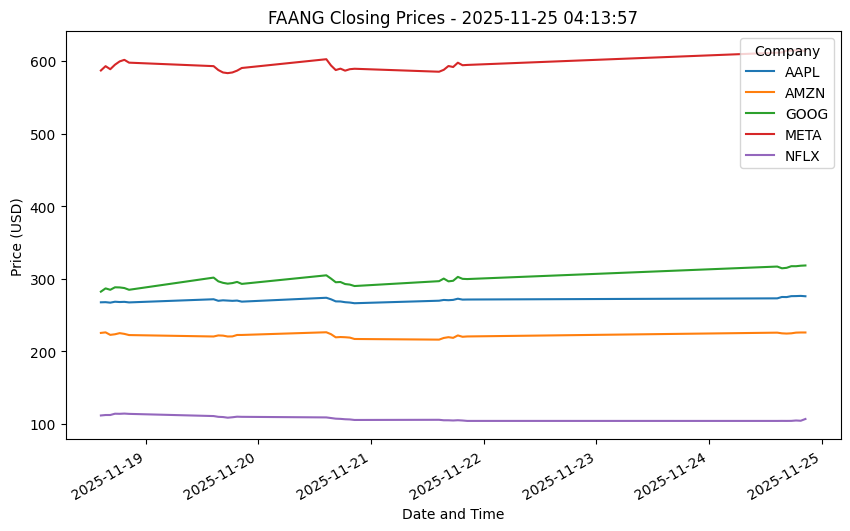

Plot saved as: plots/20251125-041359.png


In [ ]:
# Script of the `plot_data()` function
#
# References:
# https://matplotlib.org/stable/gallery/index.html
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://docs.python.org/3/library/os.html
# https://docs.python.org/3/library/glob.html
# OpenAI

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def plot_data():
    """
    Opens the latest CSV file in the 'data' folder, plots the 
    closing prices of the FAANG companies, and saves the plot 
    with a timestamped filename in the 'plots' folder.
    """
    # Find the most recent CSV file in the 'data' folder
    list_of_files = glob.glob("data/*.csv")   
    latest_file = max(list_of_files, key=os.path.getctime)
    print(f"Using latest file: {latest_file}")

    # Read the CSV with multi-level columns (Price, Ticker)
    df = pd.read_csv(latest_file, header=[0, 1], index_col=0)
    
    # Convert the index to datetime for better plotting
    df.index = pd.to_datetime(df.index)
    
    # Select only the 'Close' prices
    close_df = df['Close']

    # Format the filename timestamp (extract date&time from CSV file) for plot's title:
    base_name = os.path.basename(latest_file).replace(".csv", "")
    title_date = dt.datetime.strptime(base_name, "%Y%m%d-%H%M%S").strftime("%Y-%m-%d %H:%M:%S")
    
    # Plot the closing prices
    close_df.plot(figsize=(10, 6), title=f"FAANG Closing Prices - {title_date}")
    plt.xlabel("Date and Time")
    plt.ylabel("Price (USD)")
    plt.legend(title="Company")

    # Save the plot as a PNG in 'plots' folder
    plot_filename = f"plots/{dt.datetime.now().strftime('%Y%m%d-%H%M%S')}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Plot saved as: {plot_filename}")

# Example usage
plot_data()


---

## 🔹Problem 3: Script  

---

### - Requirements:  

Create a Python script called `faang.py` in the root of your repository.
Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.
Note that this will require a shebang line and the script to be marked executable.
Explain the steps you took in your notebook.

---

TBA

---

## 🔹Problem 4: Automation  

---

### - Requirements:  

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.

---

TBA

---

## End